In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
len(x_train),len(x_test)

(50000, 10000)

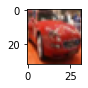

In [4]:
plt.figure(figsize = (10,1))
plt.imshow(x_train[5])

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [6]:
X_train = x_train / 255
X_test = x_test / 255

In [7]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 81s 51ms/step - loss: 1.9019 - accuracy: 0.3306
Epoch 2/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6871 - accuracy: 0.3969
Epoch 3/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.6113 - accuracy: 0.4240
Epoch 4/20
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5621 - accuracy: 0.4433
Epoch 5/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5321 - accuracy: 0.4548
Epoch 6/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5034 - accuracy: 0.4661
Epoch 7/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4851 - accuracy: 0.4742
Epoch 8/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4693 - accuracy: 0.4787
Epoch 9/20
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4511 - accuracy: 0.4828
Epoch 10/20
1563/1563 [==============================] - 78s 50m

In [8]:
model.evaluate(X_test,y_test)

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

313/313 [==============================] - 3s 8ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[529,  21,  90,   7,  50,  13,  17,  34, 192,  47],
       [ 55, 495,  28,   6,  15,  12,  20,  35, 133, 201],
       [ 73,  17, 421,  21, 232,  54,  63,  70,  32,  17],
       [ 34,  13, 183, 127, 113, 217, 124,  88,  49,  52],
       [ 54,   9, 154,  13, 544,  32,  71,  68,  43,  12],
       [ 32,   8, 179,  81, 132, 347,  62,  96,  37,  26],
       [ 13,   6, 121,  29, 205,  47, 502,  35,  27,  15],
       [ 29,   7,  97,  15, 140,  57,  23, 572,  28,  32],
       [ 98,  35,  29,   6,  28,  18,   4,  26, 706,  50],
       [ 44, 124,  37,  13,  17,  22,  24,  79, 101, 539]])>

Text(69.0, 0.5, 'Truth')

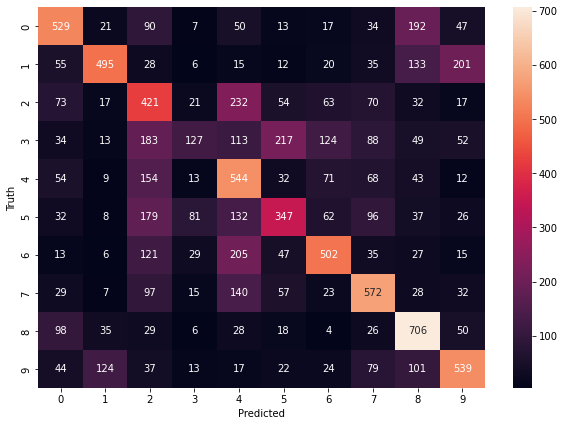

In [9]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
# y_train_categorical = keras.utils.to_categorical(
#     y_train, num_classes=10, dtype='float32'
# )
# y_test_categorical = keras.utils.to_categorical(
#     y_test, num_classes=10, dtype='float32'
# )